In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import naive_bayes

from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score

In [48]:
# Create a toy dataset with 2 features and 3 classes (0, 1, 2) with a bit of noise
n_samples = 1500
n_features = 2
n_classes = 3

X = np.random.randn(n_samples, n_features)
y = np.zeros(n_samples)
for i in range(n_classes):
    X[y == i] += np.random.randn(1, n_features) * 1.2

y = np.where(X[:, 0] > 0, 0, 1)
y = np.where(X[:, 1] > 0, y, y + 1)



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Train a Gaussian Naive Bayes classifier
clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [50]:
print(np.unique(y_train))

[0 1 2]


In [51]:
print(len(X_train))
print(len(X_cal))
print(len(X_test))

1215
135
150


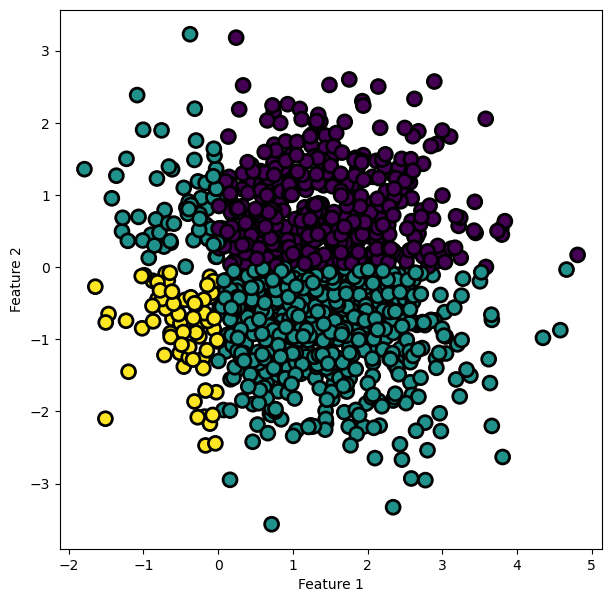

In [52]:
plt.figure(figsize=(7, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='viridis', edgecolor='k', linewidth=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [57]:

# Predict class labels and probabilities
y_pred_proba = clf.predict_proba(X_test)

# Calculate Softmax score
softmax_score = np.max(y_pred_proba, axis=1)

# Initialize the Conformal Prediction classifier
mapie_score = MapieClassifier(estimator=clf, cv="prefit", method="score")
mapie_score.fit(X_cal, y_cal)

# mapie_score.quantiles_

alpha = [0.05]
y_pred_score, y_ps_score = mapie_score.predict(X_test, alpha=alpha)

In [58]:
y_pred_score

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1])

In [69]:
y_ps_score[10]

array([[ True],
       [ True],
       [False]])

In [64]:
1-mapie_score.quantiles_

array([0.33912512])

In [70]:
y_pred_proba[10]

array([0.59623459, 0.33995724, 0.06380817])

In [19]:
1-np.array(list(map(lambda x, y:x[y], y_pred_proba, y_test)))

array([9.69652740e-05, 4.50629162e-01, 9.65704698e-03, 4.35635690e-01,
       5.34004853e-02, 2.33106727e-02, 2.83056448e-03, 5.45994370e-04,
       2.99028621e-03, 5.26564789e-06, 2.02533396e-01, 1.44137871e-01,
       6.85491995e-01, 6.29833194e-02, 2.73052365e-03, 1.52583561e-05,
       3.59982230e-01, 1.04096592e-01, 8.02076215e-03, 2.19597139e-02,
       4.50515531e-02, 2.80617947e-02, 2.16668417e-01, 6.98721221e-02,
       2.06473638e-02, 1.05264586e-01, 3.03780172e-01, 1.04718923e-03,
       7.68889952e-02, 1.38452090e-02, 3.71231384e-02, 1.29630719e-01,
       2.86199906e-02, 4.56935190e-01, 1.25172137e-01, 1.24135936e-03,
       1.23608288e-02, 2.79093705e-01, 4.39540961e-02, 4.21262342e-01,
       1.89849726e-01, 2.23845331e-01, 2.95437273e-01, 1.27169985e-01,
       8.69646249e-03, 1.92716543e-01, 7.49146693e-02, 9.27878875e-03,
       3.05000490e-02, 2.01233311e-01, 1.86937183e-04, 2.71203582e-01,
       2.41547721e-01, 3.09519211e-01, 2.08395822e-02, 4.98352252e-06,
      

In [139]:
index=(136*(1-alpha[0]))/135
index
up=1-index
lo=index-0


In [140]:
li=sorted(mapie_score.conformity_scores_)
li[0:2]

[array([1.32779884e-05]), array([0.00167487])]

In [141]:
quantile=(up*li[0])+(lo*li[1])
quantile

array([0.00160348])

In [142]:
y_pred_proba[3],y_ps_score[3]

(array([0.02380927, 0.5708726 , 0.40531814]),
 array([[False],
        [ True],
        [ True]]))

In [120]:
np.quantile(mapie_score.conformity_scores_, 0.97)

0.7410449678381508

In [110]:
y_test

array([1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1])

In [116]:
np.quantile(list(map(lambda x, y:x[y], y_pred_proba, y_test)), 0.95)

0.9885086886714133

In [98]:
y_ps_score

array([[[False],
        [ True],
        [False]],

       [[ True],
        [ True],
        [False]],

       [[ True],
        [False],
        [False]],

       [[False],
        [ True],
        [ True]],

       [[False],
        [ True],
        [False]],

       [[False],
        [ True],
        [False]],

       [[False],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [False]],

       [[ True],
        [ True],
        [False]],

       [[False],
        [ True],
        [False]],

       [[False],
        [ True],
        [ True]],

       [[False],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [False]],

       [[False],
        [ True],
        [False]],

       [[ True],
        [False],
        [False]],

       [[False],
        [ True],
        [False]],

       [[False],
        [ True],
        [False]],

       [[ True],
        [ True],
        [False]],

       [[False],
        [ True],
        [ Tr

In [96]:
mapie_score.conformity_scores_

array([[1.88162065e-01],
       [1.99924525e-01],
       [3.18504283e-01],
       [4.75581587e-01],
       [2.26499874e-02],
       [1.80244177e-02],
       [8.04285644e-02],
       [2.97646714e-01],
       [3.28021869e-01],
       [3.12492941e-01],
       [1.86655034e-01],
       [3.66258414e-01],
       [4.98067601e-01],
       [2.24504272e-01],
       [6.55304894e-01],
       [3.85587197e-01],
       [3.55378276e-01],
       [4.38134494e-01],
       [5.61451736e-01],
       [5.60943137e-01],
       [4.54321962e-01],
       [2.08288372e-01],
       [1.14439192e-01],
       [3.41518627e-01],
       [1.32779884e-05],
       [1.29615331e-01],
       [3.65968314e-01],
       [4.48686393e-01],
       [5.22805180e-01],
       [4.18970763e-01],
       [3.14892784e-01],
       [2.32116101e-01],
       [2.50821927e-01],
       [9.51771179e-02],
       [9.93454921e-02],
       [1.79739677e-01],
       [2.49340187e-01],
       [4.87400729e-01],
       [9.63590717e-02],
       [7.93616768e-01],


In [97]:
y_cal_proba

array([[8.11837935e-01, 1.88138056e-01, 2.40097171e-05],
       [8.00075475e-01, 1.99881390e-01, 4.31351131e-05],
       [1.80299893e-01, 6.81495717e-01, 1.38204390e-01],
       [4.75576760e-01, 5.24418413e-01, 4.82723825e-06],
       [2.04687089e-02, 9.77350013e-01, 2.18127855e-03],
       [1.63058171e-02, 9.81975582e-01, 1.71860056e-03],
       [1.78030821e-02, 9.19571436e-01, 6.26254823e-02],
       [7.02353286e-01, 2.97030290e-01, 6.16424583e-04],
       [2.16820302e-01, 6.71978131e-01, 1.11201567e-01],
       [1.51739147e-01, 6.87507059e-01, 1.60753794e-01],
       [1.85516569e-01, 8.13344966e-01, 1.13846481e-03],
       [6.33741586e-01, 3.63960386e-01, 2.29802868e-03],
       [5.01932399e-01, 4.98044832e-01, 2.27691119e-05],
       [2.24362712e-01, 7.75495728e-01, 1.41560347e-04],
       [3.44695106e-01, 6.55304894e-01, 1.30524315e-12],
       [6.14412803e-01, 3.83119072e-01, 2.46812462e-03],
       [6.44621724e-01, 3.54878674e-01, 4.99602459e-04],
       [1.03254062e-02, 4.27809

In [91]:
y_cal_proba

array([[8.11837935e-01, 1.88138056e-01, 2.40097171e-05],
       [8.00075475e-01, 1.99881390e-01, 4.31351131e-05],
       [1.80299893e-01, 6.81495717e-01, 1.38204390e-01],
       [4.75576760e-01, 5.24418413e-01, 4.82723825e-06],
       [2.04687089e-02, 9.77350013e-01, 2.18127855e-03],
       [1.63058171e-02, 9.81975582e-01, 1.71860056e-03],
       [1.78030821e-02, 9.19571436e-01, 6.26254823e-02],
       [7.02353286e-01, 2.97030290e-01, 6.16424583e-04],
       [2.16820302e-01, 6.71978131e-01, 1.11201567e-01],
       [1.51739147e-01, 6.87507059e-01, 1.60753794e-01],
       [1.85516569e-01, 8.13344966e-01, 1.13846481e-03],
       [6.33741586e-01, 3.63960386e-01, 2.29802868e-03],
       [5.01932399e-01, 4.98044832e-01, 2.27691119e-05],
       [2.24362712e-01, 7.75495728e-01, 1.41560347e-04],
       [3.44695106e-01, 6.55304894e-01, 1.30524315e-12],
       [6.14412803e-01, 3.83119072e-01, 2.46812462e-03],
       [6.44621724e-01, 3.54878674e-01, 4.99602459e-04],
       [1.03254062e-02, 4.27809

In [53]:
print(softmax_score[0],y_pred_proba[0])


0.7618927432861443 [0.05186637 0.76189274 0.18624088]


In [72]:
conformity_score=mapie_score.conformity_scores_
print(conformity_score[2])
print(1-y_cal_proba[2])
print(y_cal[2])

[0.31850428]
[0.81970011 0.31850428 0.86179561]
1


In [73]:
print(np.mean(conformity_score))

0.30423663446256366


In [107]:
quantile_index=round(135*0.2)
print(quantile_index)
print(conformity_score[-quantile_index])
print(mapie_score.quantiles_[0])


27
[0.35653139]
0.35653138567873977


In [71]:
cal_size=len(X_cal)
index=((cal_size+1)*0.05)/cal_size
print(sorted(conformity_score[round(index)]))

[0.1881620653259375]


In [63]:
clf.predict(X_test)

array([1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1])

In [64]:
y_pred_score

array([1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1])

In [81]:
y_ps_score[1]


array([[ True],
       [ True],
       [False]])

In [80]:
y_pred_proba[1]    

array([4.13962310e-01, 5.86034559e-01, 3.13150086e-06])

In [115]:
alpha

[0.2, 0.1, 0.05]

In [60]:
softmax_score

array([0.99062602, 0.97414755, 0.57016528, 0.71836797, 0.93236095,
       0.87248418, 0.98521604, 0.82335143, 0.94390785, 0.98633248,
       0.99831225, 0.90645228, 0.88378388, 0.75159183, 0.95310296,
       0.95810967, 0.67364779, 0.57048935, 0.94624237, 0.56143514,
       0.91732942, 0.77819944, 0.82495936, 0.94467411, 0.99999526,
       0.92291886, 0.99887581, 0.68014675, 0.99999733, 0.99951513,
       0.80534916, 0.99394252, 0.57875029, 0.53683511, 0.92377858,
       0.99999793, 0.9136366 , 0.9471423 , 0.91911367, 0.94607064,
       0.88569256, 0.99907126, 0.71408561, 0.98616753, 0.70246694,
       0.90498655, 0.77084221, 0.98403709, 0.61772936, 0.93391164,
       0.99984372, 0.95206841, 0.99983708, 0.66455942, 0.64626621,
       0.99877956, 0.99579284, 0.74390161, 0.95372695, 0.99968861,
       0.99063958, 0.68664984, 0.73491075, 0.61833794, 0.99354993,
       0.9907855 , 0.69573564, 0.84090052, 0.65655618, 0.9240924 ,
       0.95994261, 0.89710412, 0.59019253, 0.97112   , 0.77445

In [61]:
len(y_pred_proba)

150

In [62]:
len(mapie_score.conformity_scores_)

135

In [93]:
def plot_scores(n, alphas, scores, quantiles):
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
    plt.figure(figsize=(7, 5))
    plt.hist(scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=400,
            color=colors[i],
            ls="dashed",
            label=f"alpha = {alphas[i]}"
        )
    plt.title("Distribution of scores")
    plt.legend()
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

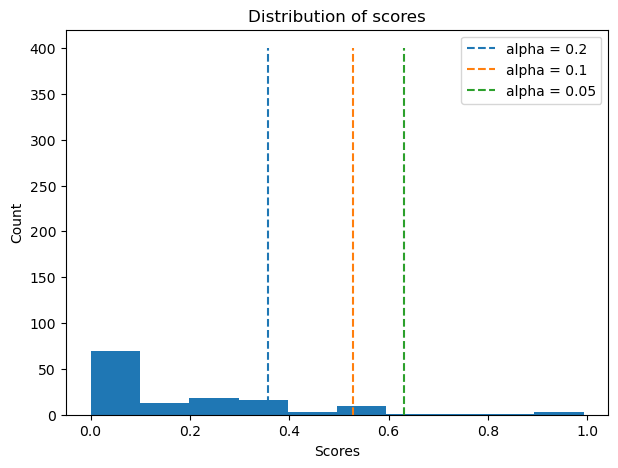

In [94]:
scores = mapie_score.conformity_scores_
n = len(mapie_score.conformity_scores_)
quantiles = mapie_score.quantiles_

plot_scores(n, alpha, scores, quantiles)

In [102]:
def plot_results(alphas, X, y_pred, y_ps):
    tab10 = plt.cm.Purples
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
    y_pred_col = list(map(colors.get, y_pred))
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))
    axs = {0: ax1, 1: ax2, 2:  ax3, 3: ax4}
    axs[0].scatter(
        X[:, 0],
        X[:, 1],
        color=y_pred_col,
        marker='.',
        s=10,
        alpha=0.4
    )
    axs[0].set_title("Predicted labels")
    for i, alpha in enumerate(alphas):
        y_pi_sums = y_ps[:, :, i].sum(axis=1)
        num_labels = axs[i+1].scatter(
            X[:, 0],
            X[:, 1],
            c=y_pi_sums,
            marker='.',
            s=10,
            alpha=1,
            cmap=tab10,
            vmin=0,
            vmax=3
        )
        plt.colorbar(num_labels, ax=axs[i+1])
        axs[i+1].set_title(f"Number of labels for alpha={alpha}")
    plt.show()


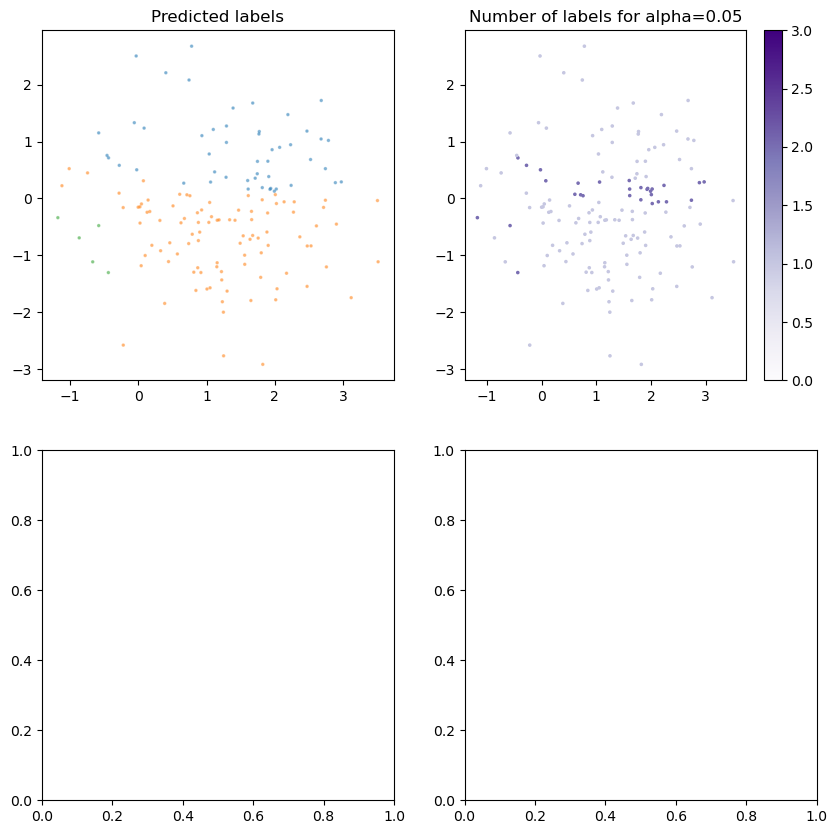

In [103]:
plot_results(alpha, X_test, y_pred_score, y_ps_score)